# 단순 선형회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 아버지와 아들의 키 - Galton

In [2]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep = '\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


 - 아버지와 아들의 키만 발췌
 - 칼럼 명을 Father, Son으로 변경
 - 단위 변경 (inch --> cm)

In [3]:
df1 = df[['Father', 'Gender', 'Height']]
df1

,Father,Gender,Height
0,78.5,M,73.2
1,78.5,F,69.2
2,78.5,F,69.0
3,78.5,F,69.0
4,75.5,M,73.5
...,...,...,...
893,68.5,M,68.5
894,68.5,M,67.7
895,68.5,F,64.0
896,68.5,F,63.5


In [5]:
df_son = df1.loc[df1.Gender == 'M', :]
df_son.head()

,Father,Gender,Height
0,78.5,M,73.2
4,75.5,M,73.5
5,75.5,M,72.5
8,75.0,M,71.0
10,75.0,M,70.5


In [14]:
del df_son['Gender']
df_son

,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5
...,...,...
890,68.5,72.0
891,68.5,70.5
892,68.5,68.7
893,68.5,68.5


In [15]:
df_son = df_son * 2.54
df_son

,Father,Height
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070
...,...,...
890,173.99,182.880
891,173.99,179.070
892,173.99,174.498
893,173.99,173.990


In [18]:
df_son.columns = ['Father', 'Son']
df_son

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070
...,...,...
890,173.99,182.880
891,173.99,179.070
892,173.99,174.498
893,173.99,173.990


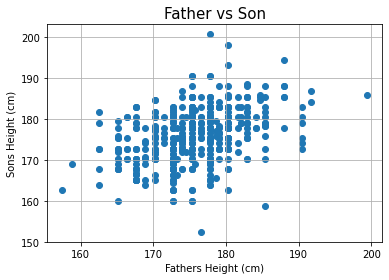

In [43]:
# 산점도 그리기
plt.scatter(df_son.Father, df_son.Son)
plt.grid()
plt.xlabel('Fathers Height (cm)')
plt.ylabel('Sons Height (cm)')
plt.title('Father vs Son', fontsize = 15)
plt.show()

 - 회귀도 구하고 그리기
  * np.linalg.lstsq()
  * np.polyfit()

In [21]:
weight, bias = np.polyfit(df_son.Father, df_son.Son, 1) # x,y, 차수
weight, bias

(0.447747917603028, 97.17763700739309)

In [22]:
# 회귀식을 2차 식으로 
np.polyfit(df_son.Father, df_son.Son, 2) # x,y, 차수

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [23]:
xs = np.array([156, 201])
ys = xs * weight + bias
ys

array([167.02631215, 187.17496845])

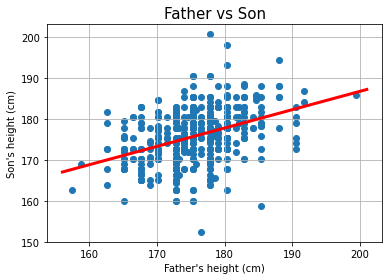

In [46]:
plt.scatter(df_son.Father, df_son.Son)
plt.plot(xs, ys, 'r-', lw=3)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son', fontsize=15)
plt.show()

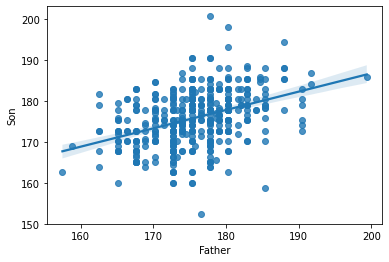

In [31]:
# Seaborn으로 산점도 그리기
import seaborn as sns
sns.regplot(x='Father', y='Son', data=df_son);

 - Scikit-Learn으로 회귀식 구하기

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [34]:
df_son.shape

(465, 2)

In [35]:
# 학습을 시키는 메소드 (단순회귀 모형일 때는 데이터프레임 열 자체를 갖고 들어와도 상관없다)
# lr.fit(df_son[['Father]],df_son[['Son]]) # 이것도 된다
lr.fit(df_son.Father.values.reshape(-1,1), df_son.Son.values.reshape(-1,1))

LinearRegression()

In [36]:
# coefficient (계수(기울기)), weight
lr.coef_

array([[0.44774792]])

In [37]:
# intercept (절편), bias
lr.intercept_

array([97.17763701])

In [38]:
# 잔차 제곱의 합 (RSS)
lr._residues

array([17556.59951549])

In [39]:
# 평가 (R Squared Value)
lr.score(df_son.Father.values.reshape(-1,1), df_son.Son.values.reshape(-1,1))

0.15312927478307048

In [42]:
from sklearn.metrics import r2_score
pred = lr.predict(df_son.Father.values.reshape(-1,1))
r2_score(df_son.Son.values, pred)

0.15312927478307048